<img height="60" width="120" src="https://shwetkm.github.io/upxlogo.png"></img>
# UpX Academy - Machine Learning Track
# Principal Component Analysis

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [35]:
student_data_mat   = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/PCA/student-mat.csv",delimiter=";")
student_data_por   = pd.read_csv("E:/pg/bpb/BPB-Publications/Datasets/unsupervised/PCA/student-por.csv",delimiter=";")
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
student_data.isnull().values.any()

False

In [37]:
col_str = student_data.columns[student_data.dtypes == object]

In [38]:
lenc = LabelEncoder()
student_data[col_str] = student_data[col_str].apply(lenc.fit_transform)

In [39]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [40]:
 # Since, G1,G2,G3 have very high correlation, we can drop G1,G2
student_data.drop(axis = 1,labels= ["G1","G2"])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10
5,0,1,16,1,1,1,4,3,3,2,...,1,0,5,4,2,1,2,5,10,15
6,0,1,16,1,1,1,2,2,2,2,...,1,0,4,4,4,1,1,3,0,11
7,0,0,17,1,0,0,4,4,2,4,...,0,0,4,1,4,1,1,1,6,6
8,0,1,15,1,1,0,3,2,3,2,...,1,0,4,2,2,1,1,1,0,19
9,0,1,15,1,0,1,3,4,2,2,...,1,0,5,5,1,1,1,5,0,15


In [41]:
label = student_data["G3"].values
predictors = student_data[student_data.columns[:-1]].values

In [42]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_

[  50.     73.64   77.17   80.38   83.02   84.91   86.69   88.42   90.04
   91.41   92.45   93.42   94.27   95.04   95.7    96.22   96.69   97.11
   97.44   97.75   98.05   98.33   98.6    98.85   99.06   99.25   99.43
   99.59   99.74   99.85   99.96  100.04]


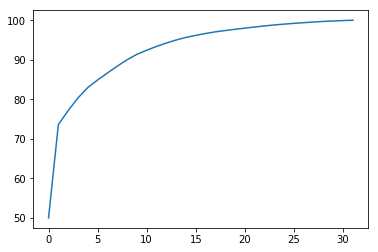

In [43]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [44]:
#Looking at above plot I'm taking 10 variables
pca = PCA(n_components=10)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[ 2.52099452  7.58592062 -0.24577283 ..., -1.11873862 -0.5739717
   3.17094001]
 [ 0.53437981  8.88093505 -2.67734967 ..., -0.6884298  -1.06302422
   0.58707977]
 [ 6.1399219   4.75465142 -2.12759304 ...,  0.99894532 -0.15659496
  -0.43352133]
 ..., 
 [ 1.4398107  -0.39764959 -2.84001858 ...,  0.03130708  2.61632879
  -0.71795625]
 [ 1.89905179  1.76275675  1.36717761 ..., -1.8237852   0.9159547
  -1.52192647]
 [-0.22128344  1.2728206   1.37413989 ..., -0.20290912  1.54678353
  -1.32976256]]


In [45]:
clf_rf_pca = linear_model.LinearRegression()
clf_rf_pca.fit(Transformed_vector,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
score_rf_pca = cross_val_score(clf_rf_pca, Transformed_vector, label, cv=5)
print("Cross Validation score : " + str(score_rf_pca))
print("Cross Validation Mean score : " + str(score_rf_pca.mean()))

Cross Validation score : [ 0.88132786  0.73142573  0.7345974   0.82742635  0.82918593]
Cross Validation Mean score : 0.800792655346
